In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#!unzip "/content/drive/My Drive/colab/dataset.zip"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
import tensorflow as tf                                                         
                                                                                
mnist = tf.keras.datasets.mnist                                                 
                                                                                
#(x_train, y_train), (x_test, y_test) = mnist.load_data()                        
#x_train, x_test = x_train / 255.0, x_test / 255.0                               
                                                                                
#ts = x_train.shape                                                              
#x_train = x_train.reshape(ts[0], ts[1], ts[2], 1)                               
#tt = x_test.shape                                                               
#x_test = x_test.reshape(tt[0], tt[1], tt[2], 1)                                 
                                                                                
model = tf.keras.models.Sequential([            
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64,
                                                      interpolation='bilinear'),                          
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu',                          
                         input_shape=(64, 64, 3)),                              
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Flatten(),                                                    
  tf.keras.layers.Dropout(rate=.25),                                            
  tf.keras.layers.Dense(200, activation='relu'),                                
  tf.keras.layers.Dense(2, activation='softmax')                               
])                                                                              
                                                                                
optimizer = tf.keras.optimizers.Adam(decay=.0001)                               
                                                                                
model.compile(optimizer=optimizer,                                              
              loss='sparse_categorical_crossentropy',                           
              metrics=['accuracy'])                                             
                                                                                
#model.fit(x_train, y_train, epochs=5)

#model.evaluate(x_test, y_test) 

In [6]:
model.fit(training_set,
          epochs = 25)

Epoch 1/25
6/6 [==============================] - 27s 4s/step - loss: 0.8219 - accuracy: 0.5667
Epoch 2/25
6/6 [==============================] - 1s 101ms/step - loss: 0.6754 - accuracy: 0.5000
Epoch 3/25
6/6 [==============================] - 1s 101ms/step - loss: 0.6717 - accuracy: 0.5000
Epoch 4/25
6/6 [==============================] - 1s 100ms/step - loss: 0.6536 - accuracy: 0.5000
Epoch 5/25
6/6 [==============================] - 1s 103ms/step - loss: 0.6428 - accuracy: 0.5056
Epoch 6/25
6/6 [==============================] - 1s 102ms/step - loss: 0.6295 - accuracy: 0.6167
Epoch 7/25
6/6 [==============================] - 1s 110ms/step - loss: 0.6055 - accuracy: 0.6333
Epoch 8/25
6/6 [==============================] - 1s 109ms/step - loss: 0.6025 - accuracy: 0.6889
Epoch 9/25
6/6 [==============================] - 1s 107ms/step - loss: 0.5883 - accuracy: 0.7389
Epoch 10/25
6/6 [==============================] - 1s 102ms/step - loss: 0.5349 - accuracy: 0.7389
Epoch 11/25
6/6 [====

In [7]:
model.evaluate(test_set)

1/1 [==============================] - 0s 208ms/step - loss: 0.1890 - accuracy: 0.9500


[0.1890193521976471, 0.949999988079071]

[[0.01683548 0.9831645 ]]
En la imágen hay una vaca.


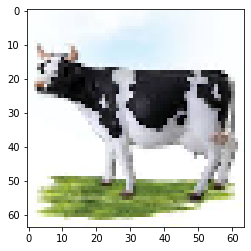

In [19]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.image as mpimg
clases = ("gallina", "vaca")
b = test_set.next()
x = np.array(b[0][0])
plot.imshow(x)
prediccion = model.predict(b[0][0:1])
print(prediccion) # predicción sobre una imágen aleatoria, primer valor es de avión, segundo de helicoptero
index=np.where(prediccion==np.max(prediccion[0]))
print("En la imágen hay una %s." %clases[int(index[1])])